### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Model
from keras import layers
import tensorflow as tf
from keras.utils import to_categorical
from sklearn.utils import shuffle
from keras.metrics import CategoricalAccuracy,BinaryAccuracy,Recall,Precision
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import cv2

### Connection with google drive
#### Data is inside our drive

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


### Setting the Path of Our dataset
#### Changing Directory path and setting the dataset URL

In [3]:
import os
dataset_url = '/content/drive/MyDrive/Chest_CT_Scan/Data'
os.chdir('/content/drive/MyDrive/Chest_CT_Scan/Data')


### Training testing and validation data path

In [4]:
train_dataset=os.path.join(dataset_url,"train")
val_dataset=os.path.join(dataset_url,"valid")
test_dataset=os.path.join(dataset_url,"test")

### Setting the label by Folder Name
#### These are the 4 disease on that are going to train our Model

In [5]:
folder_labels={"adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib":0,
               "large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa":1,
               "squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa":2,
               "normal":3}

### No of data of each label in the training Folder

In [6]:
for folder in os.listdir(train_dataset):
  print(folder,len(os.listdir(os.path.join(train_dataset,folder))))


squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa 155
large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa 115
normal 148
adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib 195


### No of data of each label in the validation Folder

In [7]:
for folder in os.listdir(val_dataset):
  print(folder,len(os.listdir(os.path.join(val_dataset,folder))))


normal 13
squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa 15
large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa 21
adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib 23


### No of data of each label in the testing Folder

In [8]:
for folder in os.listdir(test_dataset):
  print(folder,len(os.listdir(os.path.join(test_dataset,folder))))


normal 54
adenocarcinoma 120
large.cell.carcinoma 51
squamous.cell.carcinoma 90


## Data Preprocessing

### Reading training data with their corresponding label from folder name

In [9]:

train_images,train_labels=[],[]
for folder in os.listdir(train_dataset):
  count=0
  print(folder)
  try:
    for i,image in enumerate(os.listdir(os.path.join(train_dataset,folder))):
      img=cv2.imread(os.path.join(train_dataset,os.path.join(folder,image)))
      img=cv2.resize(img,(224,224))
      count=count+1
      if i%100==0:
        print(i)
      train_images.append(img)
      train_labels.append(folder_labels[folder])

  except:
    print(image)


squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa
0
100
large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa
0
100
normal
0
100
adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib
0
100


### Reading validation data with their corresponding label from folder name

In [10]:

val_images,val_labels=[],[]
for folder in os.listdir(val_dataset):
  count=0
  print(folder)
  try:
    for i,image in enumerate(os.listdir(os.path.join(val_dataset,folder))):
      img=cv2.imread(os.path.join(val_dataset,os.path.join(folder,image)))
      img=cv2.resize(img,(224,224))
      count=count+1
      if i%100==0:
        print(i)
      val_images.append(img)
      val_labels.append(folder_labels[folder])

  except:
    print(image)


normal
0
squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa
0
large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa
0
adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib
0


### Reading test data with their corresponding label from folder name

In [11]:
folder_labels={"adenocarcinoma":0,
               "large.cell.carcinoma":1,
               "squamous.cell.carcinoma":2,
               "normal":3}
test_images,test_labels=[],[]
for folder in os.listdir(test_dataset):
  count=0
  print(folder)
  try:
    for i,image in enumerate(os.listdir(os.path.join(test_dataset,folder))):
      img=cv2.imread(os.path.join(test_dataset,os.path.join(folder,image)))
      img=cv2.resize(img,(224,224))
      count=count+1
      if i%100==0:
        print(i)
      test_images.append(img)
      test_labels.append(folder_labels[folder])

  except:
    print(image)


normal
0
adenocarcinoma
0
100
large.cell.carcinoma
0
squamous.cell.carcinoma
0


### Calculating No of Samples of Each Class

#### training data No of Samples of each Class

In [12]:
import pandas as pd
pd.Series(train_labels).value_counts()

0    195
2    155
3    148
1    115
dtype: int64

#### validation data No of Samples of each Class

In [13]:
import pandas as pd
pd.Series(val_labels).value_counts()

0    23
1    21
2    15
3    13
dtype: int64

#### testing data No of Samples of each Class

In [14]:
import pandas as pd
pd.Series(test_labels).value_counts()

0    120
2     90
3     54
1     51
dtype: int64

#### Combining all the data (train+test+val)
#### We are using train test split to make 80% train and 20% test

In [15]:
images = train_images + val_images+test_images
labels = train_labels + val_labels+test_labels

In [16]:
image=np.array(images)
label=np.array(labels)

### Train Test Split to make 80% data for training and 20% for validation or testing

In [17]:
## split train / test

indices_train, indices_test = train_test_split(list(range(image.shape[0])), train_size=0.8, test_size=0.2, shuffle=True)

x_train = image[indices_train]
y_train = label[indices_train]
x_test = image[indices_test]
y_test = label[indices_test]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((800, 224, 224, 3), (800,), (200, 224, 224, 3), (200,))

### Converting the label to categorical format

In [18]:
from keras.utils import to_categorical
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

y_train.shape, y_test.shape

((800, 4), (200, 4))

In [19]:
y_train

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]], dtype=float32)

In [20]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((800, 224, 224, 3), (800, 4), (200, 224, 224, 3), (200, 4))

## Vision Transformer Model Implementation

### Instaling the required packages

In [21]:
!pip install -U tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 7.6 MB/s eta 0:00:00


### Importing Libraries

In [22]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


### Defining shape and no of label

In [23]:
num_classes = 4
input_shape = (224,224, 3)

In [24]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((800, 224, 224, 3), (800, 4), (200, 224, 224, 3), (200, 4))

### Defining hyperparameter for the Model

In [25]:
batch_size = 16
num_epochs = 50
image_size = 224  # We'll resize input images to this size
patch_size = 8  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024]

### Augmentation techniques

In [26]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)

### Tranformer Architecture (MLP, Patches encoder, VIT  Block)

In [27]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x) # GELU activation function
        x = layers.Dropout(dropout_rate)(x) # Dropout layer
    return x


In [28]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

Image size: 224 X 224
Patch size: 8 X 8
Patches per image: 784
Elements per patch: 192


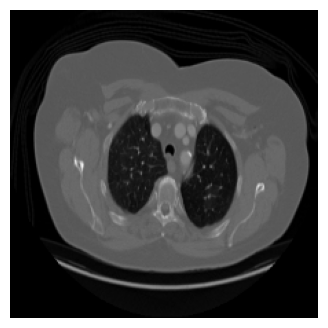

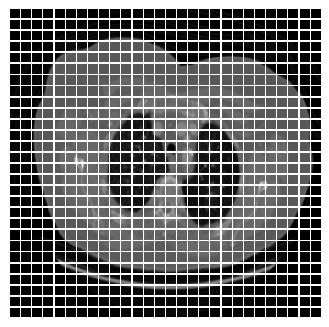

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = x_train[np.random.choice(range(x_train.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

In [30]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

#### Vision Transformer Classifier
##### Input Layer
##### Augmentation
##### Paching the Images
##### Encode the patches
##### Transformer Block(Attention mechanism and MLP)

In [31]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes, activation="sigmoid")(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

### Defining Evaluation Matrix

In [32]:
from matplotlib import pyplot
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,cohen_kappa_score,roc_auc_score,confusion_matrix,classification_report

### Compiling the Model

In [33]:
# compile the model
model = create_vit_classifier()
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=[keras.metrics.CategoricalAccuracy(name="accuracy")],
)
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 data_augmentation (Sequential)  (None, 224, 224, 3)  7          ['input_1[0][0]']                
                                                                                                  
 patches_1 (Patches)            (None, None, 192)    0           ['data_augmentation[0][0]']      
                                                                                                  
 patch_encoder (PatchEncoder)   (None, 784, 64)      62528       ['patches_1[0][0]']          

### Training the Model

In [ ]:
# train the model
history = model.fit(
    x_train, y_train, batch_size=16, epochs=70, validation_data=(x_test, y_test)
)

# evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {round(loss, 2)}")
print(f"Test accuracy: {round(accuracy * 100, 2)} %")

Epoch 1/70
50/50 [==============================] - 50s 350ms/step - loss: 3.9882 - accuracy: 0.4025 - val_loss: 1.7065 - val_accuracy: 0.5650
Epoch 2/70
50/50 [==============================] - 16s 324ms/step - loss: 2.9768 - accuracy: 0.4675 - val_loss: 1.3938 - val_accuracy: 0.6100
Epoch 3/70
50/50 [==============================] - 16s 329ms/step - loss: 2.4362 - accuracy: 0.4988 - val_loss: 0.9253 - val_accuracy: 0.6800
Epoch 4/70
50/50 [==============================] - 17s 333ms/step - loss: 2.0764 - accuracy: 0.5138 - val_loss: 0.9877 - val_accuracy: 0.6400
Epoch 5/70
50/50 [==============================] - 17s 336ms/step - loss: 1.8758 - accuracy: 0.5337 - val_loss: 0.8457 - val_accuracy: 0.6750
Epoch 6/70
50/50 [==============================] - 17s 339ms/step - loss: 1.7072 - accuracy: 0.5537 - val_loss: 1.0358 - val_accuracy: 0.6750
Epoch 7/70
50/50 [==============================] - 17s 343ms/step - loss: 1.5196 - accuracy: 0.5650 - val_loss: 0.8731 - val_accuracy: 0.6350

## Saving the results (accuracy Graph, Loss graph, confusion Matrix)

### Loss and accuracy Graph

In [ ]:
os.chdir('/content/drive/MyDrive/Chest_CT_Scan')

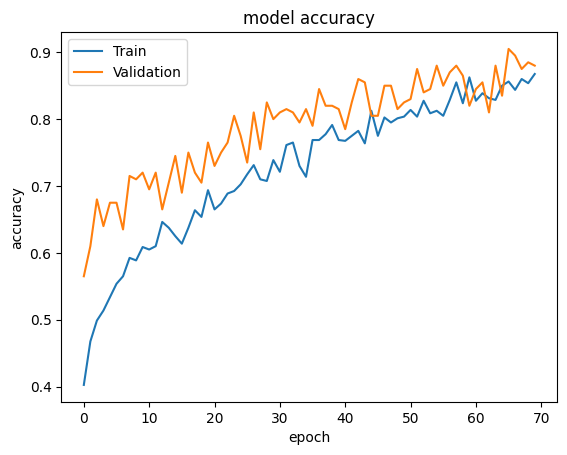

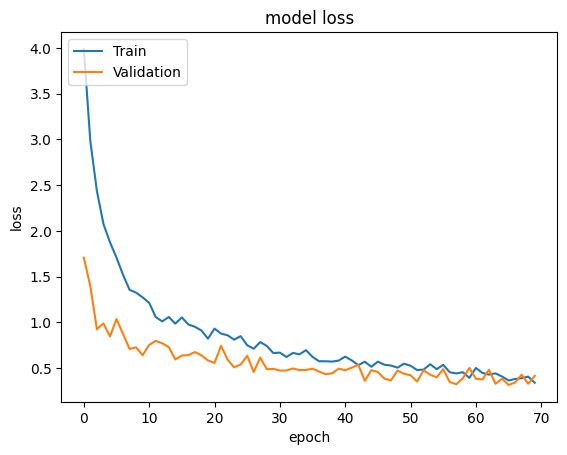

In [ ]:
import matplotlib.pyplot as plt
output_folder = 'Results'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
# summarize history for accuracy
plt.plot(history.history['accuracy'],label="train_acc")
plt.plot(history.history['val_accuracy'],label="val_acc")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("/content/drive/MyDrive/Chest_CT_Scan/Results/accuracyplot.png")
plt.show()
# summarize history for loss
plt.plot(history.history['loss'],label="train_loss")
plt.plot(history.history['val_loss'],label="val_loss")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("/content/drive/MyDrive/Chest_CT_Scan/Results/lossplot.png")
plt.show()

### Confusion Matrix

In [ ]:
y_pred=model.predict(x_test)

7/7 [==============================] - 2s 170ms/step


In [ ]:
y_pred=np.argmax(y_pred,axis=1)

In [ ]:
y_test=np.argmax(y_test, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[56, 10,  3,  1],
       [ 2, 36,  0,  0],
       [ 7,  1, 40,  0],
       [ 0,  0,  0, 44]])

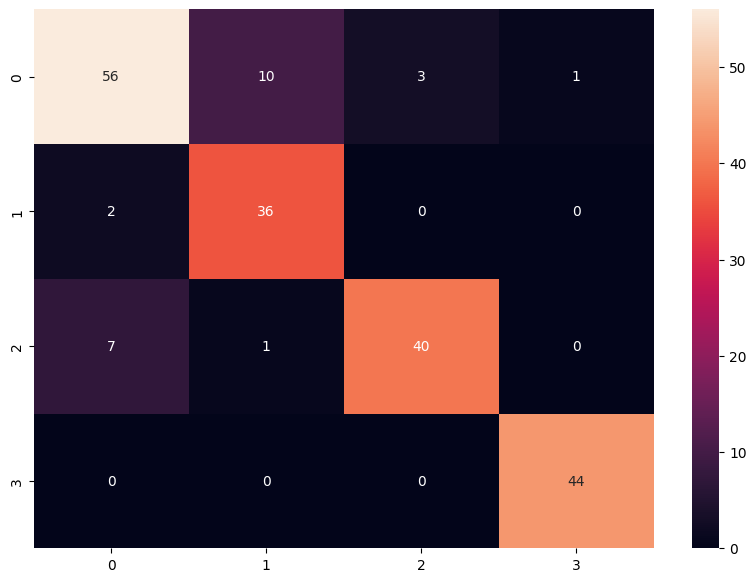

In [ ]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='g')
plt.savefig("/content/drive/MyDrive/Chest_CT_Scan/Results/CM.png")

### Classification Report

In [ ]:
classes = ["adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib","large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa",
               "squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa","normal"]
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,target_names=classes))


                                                  precision    recall  f1-score   support

      adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib       0.86      0.80      0.83        70
   large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa       0.77      0.95      0.85        38
squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa       0.93      0.83      0.88        48
                                          normal       0.98      1.00      0.99        44

                                        accuracy                           0.88       200
                                       macro avg       0.88      0.90      0.89       200
                                    weighted avg       0.89      0.88      0.88       200



In [ ]:
# history
print(f'The model has a best accuracy of {round(max(history.history["accuracy"])*100,2)}% and a best loss of {round(min(history.history["loss"]),2)}')



The model has a best accuracy of 86.75% and a best loss of 0.34
